# Test Technique Customs Bridge - Python/Data

## Exercice 1: Développement Python basique

In [ ]:
import random
import socket
nums = []
#la boucle while pour demander à l'utilisateur d'inserer une valeur
while len(nums)<=6:
    i = int(input('Entrer un entier entre 1 et 49: '))
#on rajoute la condition suivante pour ne pas avoir le méme nombre
    if i not in nums and i <50 : 
      nums.append(i)
#sorted pour ordonner les éléments de la liste
print(sorted(nums))

## Exercice 2: Algorithmie

In [ ]:
import random
#la fonction genere_tableau génère un tableau de taille longueur dont les valeurs sont comprise entre min et max et qui sont ordonnées
# NBR est la variable qui enregistre le nombre aléatoire qui va etre inserer dans la tableau 
def genere_tableau (longueur,min,max):
    L = sorted(random.sample(range(min,max), longueur))
    NBR=random.randint(min,max)
#on affiche par la suite le tableau et le nombre qui sont générer aléatoirement
    print("La liste est :\n", L)
    print("le nombre à insérer est : \n", NBR)
    print("l'indice de l'élément est ",DPMR(NBR,L))
    print("la liste final", L.insert((DPMR(NBR,L)),NBR))
#la fonction DPMR est une fonction récussive qui renvoie l'indice du nombre aléatoire qu'on veut inserer au tableau qui est déjà ordonnée
def DPMR(element, liste_intermediaire):
    m = len(liste_intermediaire)//2
#le principe de diviser pour régner consiste à déviser le problème pour retrouver une somution dans un intervalle de temps plus court et donc conserver les resources
#pour appliquer ce principe à ce problème on divise le tableau en deux succesivement : liste_intermediaire en comparant la valeur de l'indice de mileu avec la valeur qu'on veut insérer
#on va avoir une fonction récursive jusqu'à ce qui la taille de matrice liste_trié égale à 1 :c'est la condition d'arrét 
    if len(liste_intermediaire)>1 :
        if liste_intermediaire[m] == element:
#si par hasard le nombre qu'on veut inserer égale à une valeur de liste on va retourner son indice
            return m
        elif liste_intermediaire[m] > element:
#si l'element est plus granque que la valeur de l'indice du milieu, on retourne la fonction appliqué au deumi tableau à gauche
            return DPMR(element, liste_intermediaire[:m])
        else :
# c'est l'inverse dans ce cas, et pour conserver le numoré d'indice on rajoute m
            return m + DPMR(element, liste_intermediaire[m:])
    elif len(liste_intermediaire)==1:
#on traite la condition d'arret, on a trois cas(si l'element est inférieur ou égale à la valeur on retourne son indice sinon on retourne m+1 (il occupera la position d'après))
        if liste_intermediaire[m] == element:
            return m
        elif liste_intermediaire[m] > element:
            return m
        else :
            return m + 1
    

print(genere_tableau(10,3,45))

## Exercice 3: Analyse et visualisation

In [1]:
import pandas as pd
#la librérie pandas pour lire les fichier csv
codes_dispo = pd.read_csv("codes disponibles.csv")
tous_codes = pd.read_csv("tous les codes.csv")

In [2]:
# on crée une série "a" pour centinir tous les code les codes, et une série "d" pour contenir tous les codes disponibles
a = []
d = []
d = codes_dispo['codes']
a = tous_codes['codes']

In [3]:
# Calculer le pourcentage des codes disponibles par rapport à tous les codes.
def pourcentage_codes(list1, list2):
    intersection = len(set(list1).intersection(list2))
    total = len(list1)+len(list2)
    return (intersection/total)*100

In [4]:
pourcentage_codes(a,d)

0.5975126128166456

In [5]:
# on transforme a et d en 2 listes pour faciliter le calcul
acl = a.tolist()
cdl = d.tolist()

In [6]:
# on crée un dictionnaire qui continent comme clé les codes et comme valeur leur fréquences.
dicti = d.value_counts()
dictionnaire = dicti.to_dict()


In [7]:
# Calculer la fréquence d’un code disponible donné.
def frequence_code(code):
    dicti = d.value_counts()
    dictionnaire = dicti.to_dict()
    if code in cdl:
        return dictionnaire[code]
    else :
        return 0

In [8]:
frequence_code(847160)

326

In [ ]:
#Afficher un graphique qui compare les fréquences de 5 codes disponibles
import matplotlib.pyplot as plt
def graphe_5code():
    l=[]
    for i in range(2):
        x=int(input("veuillez entrer un code"))
        l.append(str(x))
    return l
list_code=graphe_5code()
frequence = [frequence_code(int(x)) for x in list_code ]
print(frequence)
plt.bar(list_code, frequence, color='green')
plt.xlabel("le code")
plt.ylabel("la fréquence du code")
plt.title("graphe comparant la fréquence des codes")

{'whiskers': [<matplotlib.lines.Line2D at 0x2225313f3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2225313fa60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2225313f040>],
 'medians': [<matplotlib.lines.Line2D at 0x2225314a160>],
 'fliers': [<matplotlib.lines.Line2D at 0x2225314a460>],
 'means': []}

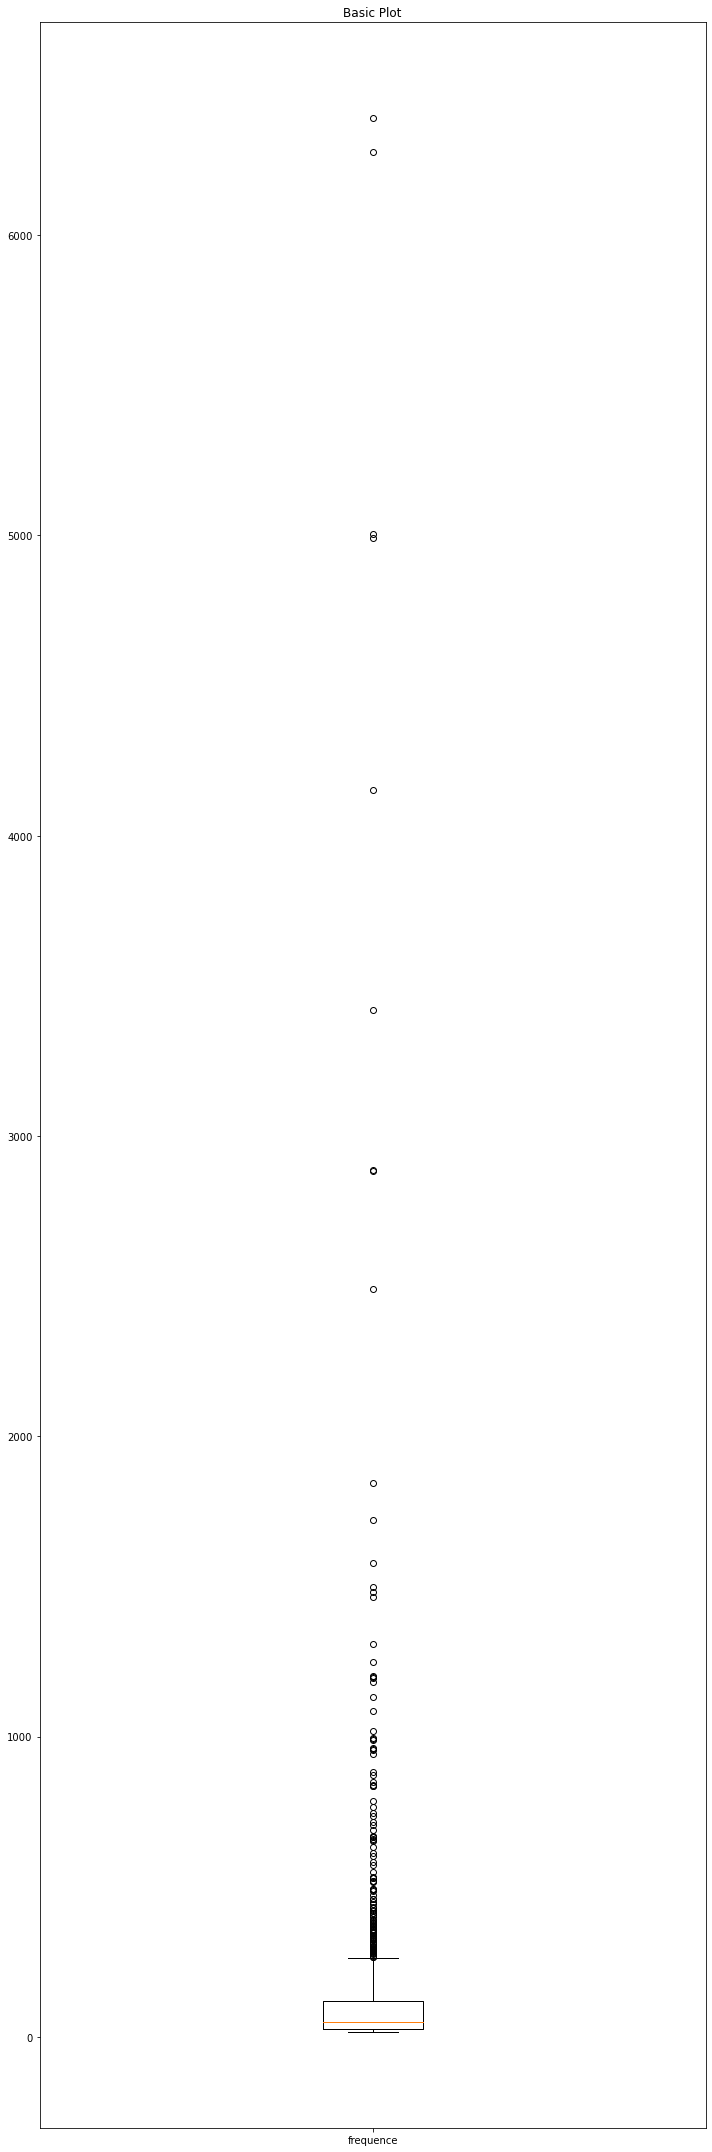

In [36]:
#Afficher un graphique qui permet de visualiser le maximum, minimum, médiane,et la moyenne des fréquences des codes disponibles.
#dans cette partie, j'ai utiliser un boxplote(boite à moustache) qui sert à visualiser la médianne( le trait en rouge), les quartiles , le min et le max qui sont les valeurs abérrante (en extrémité)
liste= dictionnaire.values()
fig1, ax1 = plt.subplots(figsize=(10,30))
ax1.set_title('Basic Plot')
ax1.boxplot(liste,labels=['frequence'])

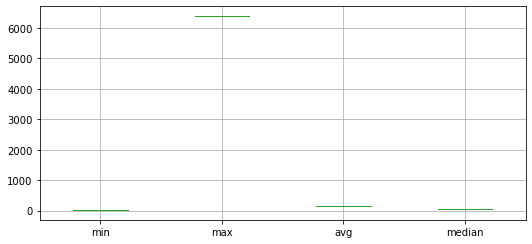

In [37]:
#pour mieux visualiser le max , min , moyenne et la mediane, on plote ces valeur dans un seul graphe
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
data = list(dictionnaire.values())
min = np.min(data)
max = np.max(data)
avg = np.mean(data)
median = np.median(data)
df = pd.DataFrame(dict(min= [min], max=[max], avg=[avg], median=[median]))
df.boxplot()
plt.show()
